In [79]:
#Q1:Region 9 made the most amount of units sold,1076. It also hosted the most amount of price sold which is 10168.17. The amount of missing categorical data is close to 10% of the 
#overall data set, which makes a significant impact on the overall calculation of the sales performance result. The amount of price and units sold for Others placed 2rd in the result. 
#Number of units sold spread from 2 to 18 among all regions. Within Region 9, product 7, product 6 and product 28 were making most units of sales with a mean of units sales 17 and 16 
#in Region9. Product 10 is the most frequently product sold among all regions in the top 5 selling products. 

#Q2:

#Q3: As we browsing the data, it shows Region, Product, Price, Units Sold all have missing values.
# The mean and mode for Units Sold are almost equal which suggested a normal distribution among units sold, therefore empty cell were filled using the mean of Units Sold
# Because product price for same product that was sold on the same day within the same region are different, emptycell can not be filled with the relavent product, therefor
# it is also filled with mean of price. Null values in categorical data Region and Product are labeled as 'Other' specificly to reduce the impact of random generated region or product
# would dramticly impact the research. Outliers in price and Units sold are identified and removed by using box plot.

In [134]:
import pandas as pd
import seaborn as sns

In [64]:
df= pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/sales_data.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [66]:
df.describe(include= 'all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [68]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [69]:
df['Product'] = df['Product'].fillna('Other')
df['Region']= df['Region'].fillna('Other')

df.head(20)

,Product,Region,Price,Units Sold,Sale Date
0,Other,Region_6,75.96,10.0,2022-01-01
1,Other,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
7,Product_18,Region_7,19.27,9.0,2022-01-08
8,Product_16,Region_9,30.70,14.0,2022-01-09
9,Product_9,Region_2,264.05,7.0,2022-01-10


In [70]:
df['Price']=df['Price'].fillna(df['Price'].mean())
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())
df.head(20)

,Product,Region,Price,Units Sold,Sale Date
0,Other,Region_6,75.960000,10.000000,2022-01-01
1,Other,Region_1,175.780000,8.000000,2022-01-02
2,Product_46,Region_3,20.430000,12.000000,2022-01-03
3,Product_36,Region_1,12.770000,10.000000,2022-01-04
4,Product_17,Region_6,125.690000,6.000000,2022-01-05
5,Product_45,Region_1,8.630000,11.000000,2022-01-06
6,Product_31,Region_3,23.730000,6.000000,2022-01-07
7,Product_18,Region_7,19.270000,9.000000,2022-01-08
8,Product_16,Region_9,30.700000,14.000000,2022-01-09
9,Product_9,Region_2,264.050000,7.000000,2022-01-10


<Axes: >

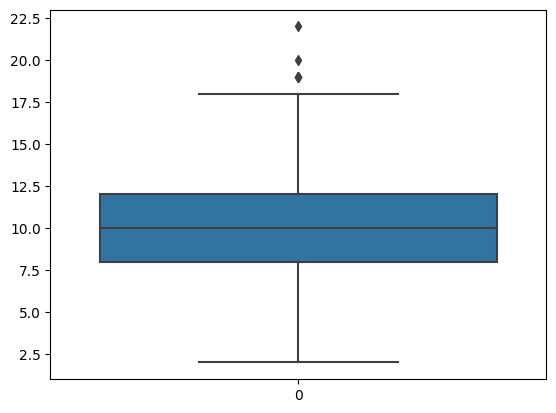

In [71]:
sns.boxplot(df['Units Sold'])

<Axes: >

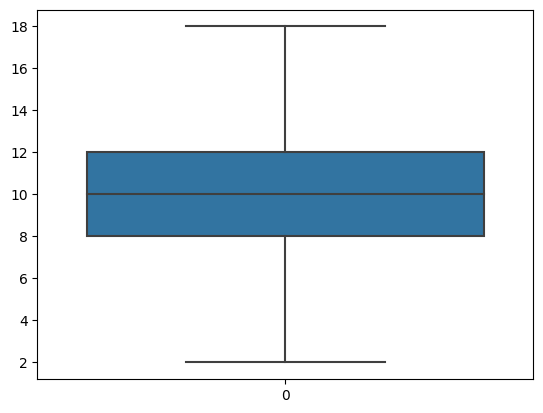

In [72]:
df[df['Units Sold']>18]
df.drop(df[df['Units Sold'] > 18].index, inplace = True)
sns.boxplot(df['Units Sold'])

Product       12
Region        12
Price         12
Units Sold    12
Sale Date     12
dtype: int64

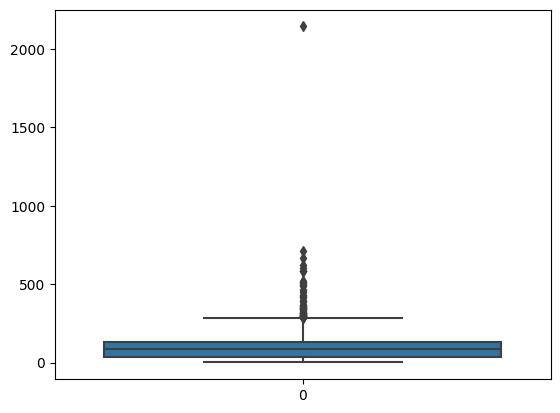

In [73]:
sns.boxplot(df['Price'])
df[df['Price']>500].count()

<Axes: >

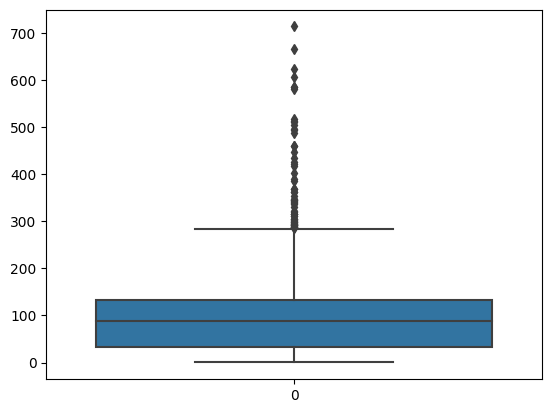

In [74]:
df.drop(df[df['Price'] > 1000].index, inplace = True)
sns.boxplot(df['Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     996 non-null    object        
 1   Region      996 non-null    object        
 2   Price       996 non-null    float64       
 3   Units Sold  996 non-null    float64       
 4   Sale Date   996 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 79.0+ KB


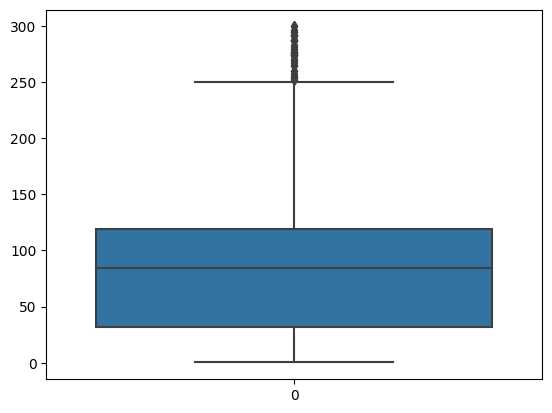

In [76]:
df.drop(df[df['Price'] > 300].index, inplace = True)
sns.boxplot(df['Price'])
df.info()

<Axes: xlabel='Region', ylabel='Units Sold'>

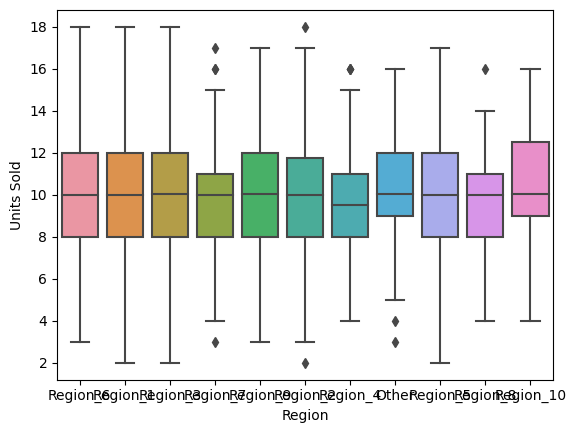

In [89]:
sns.boxplot(x='Region', y='Units Sold', data =df)

In [169]:
total_units_sold = df.groupby('Region')['Units Sold'].sum()
total_price_sold=df.groupby('Region')['Price'].sum()
total_price_sold

Region
Other         9228.553439
Region_1      6576.328190
Region_10     9007.646878
Region_2      7980.659503
Region_3      8750.141630
Region_4      8424.202942
Region_5      8830.505566
Region_6      6928.254254
Region_7      6474.149503
Region_8      8033.655566
Region_9     10168.166063
Name: Price, dtype: float64

In [143]:
df_region1 = df[df['Region']=='Region_1'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region2 = df[df['Region']=='Region_2'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region3 = df[df['Region']=='Region_3'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region4 = df[df['Region']=='Region_4'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region5 = df[df['Region']=='Region_5'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region6 = df[df['Region']=='Region_6'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region7 = df[df['Region']=='Region_7'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region8 = df[df['Region']=='Region_8'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region9 = df[df['Region']=='Region_9'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region10 = df[df['Region']=='Region_10'].groupby('Product')['Units Sold'].aggregate(['mean']) . sort_values('mean', ascending = False).head(5)
df_region1

,mean
Product,
Product_42,16.000000
Product_20,14.500000
Product_2,14.333333
Product_19,13.000000
Product_10,13.000000


In [131]:
df_region1['Region'] ='Region_1'
df_region2['Region'] ='Region_2'
df_region3['Region'] ='Region_3'
df_region4['Region'] ='Region_4'
df_region5['Region'] ='Region_5'
df_region6['Region'] ='Region_6'
df_region7['Region'] ='Region_7'
df_region8['Region'] ='Region_8'
df_region9['Region'] ='Region_9'
df_region10['Region'] ='Region_10'

df_region1

,mean,Region
Product,,
Product_42,16.000000,Region_1
Product_20,14.500000,Region_1
Product_2,14.333333,Region_1
Product_19,13.000000,Region_1
Product_10,13.000000,Region_1


In [132]:
group_by_region = pd.concat([df_region1,df_region2,df_region3,df_region4,df_region5,df_region6,df_region7,df_region8,df_region9,df_region10],ignore_index= False)

In [135]:
group_by_region.sort_values('mean', ascending = False)

,mean,Region
Product,,
Product_7,17.000000,Region_9
Product_10,17.000000,Region_3
Product_3,16.500000,Region_2
Product_42,16.000000,Region_1
Product_30,16.000000,Region_4
Product_6,16.000000,Region_9
Product_28,16.000000,Region_9
Product_10,16.000000,Region_2
Product_13,16.000000,Region_2
